In [1]:
import pandas as pd
import numpy as np
from pylab import rcParams
import matplotlib.pyplot as plt

import seaborn as sns
from matplotlib import rc
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8

In [2]:
data = pd.read_csv("/Users/ajaymunjamani/Downloads/London.csv")

## EDA

In [3]:
data.head()

,House Type,Area,Bedrooms,Bathrooms,Receptions,County,Price
0,House,2716,5,5,5,London,1675000
1,Flat / Apartment,814,2,2,2,London,650000
2,Flat / Apartment,761,2,2,2,London,735000
3,House,1986,4,4,4,London,1765000
4,Flat / Apartment,700,2,2,2,London,675000


/Users/ajaymunjamani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


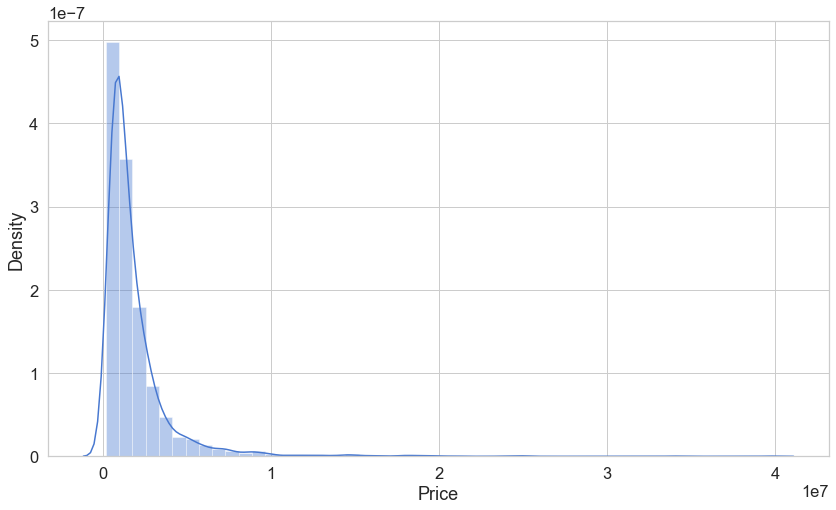

In [4]:
sns.distplot(data['Price']);

In [5]:
data.shape


(3480, 7)

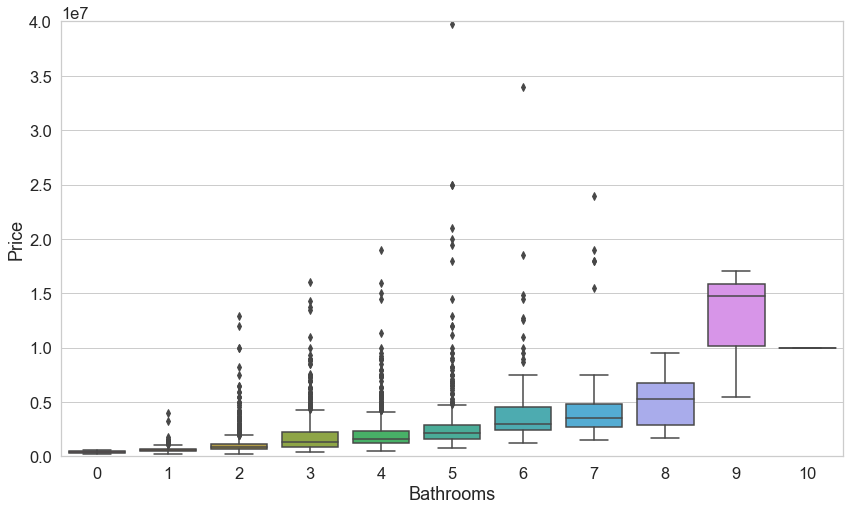

In [6]:
var = 'Bathrooms'
data1 = pd.concat([data['Price'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=40000000);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


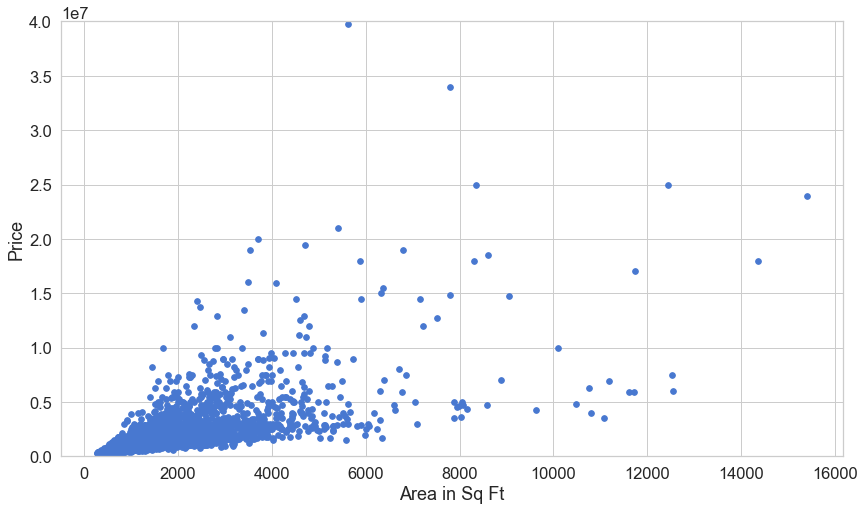

In [7]:
var = 'Area'
data2 = pd.concat([data['Price'], data[var]], axis=1)
data.plot.scatter(x=var, xlabel = 'Area in Sq Ft', y='Price', ylim=(0,40000000), s=32);

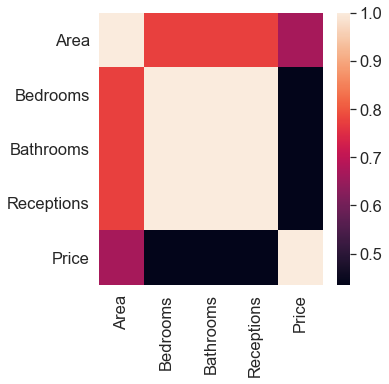

In [8]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corrmat);

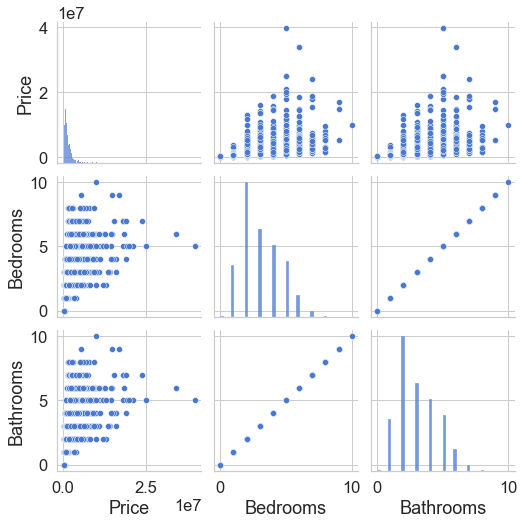

In [9]:
cols = ['Price', 'Bedrooms', 'Bathrooms']
sns.pairplot(data[cols]);

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   House Type  3480 non-null   object
 1   Area        3480 non-null   int64 
 2   Bedrooms    3480 non-null   int64 
 3   Bathrooms   3480 non-null   int64 
 4   Receptions  3480 non-null   int64 
 5   County      3480 non-null   object
 6   Price       3480 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 190.4+ KB


In [11]:
for column in data.columns:
    print(data[column].value_counts())
    print("-"*40)

Flat / Apartment    1565
House               1430
New development      357
Penthouse            100
Studio                10
Bungalow               9
Duplex                 7
Mews                   2
Name: House Type, dtype: int64
----------------------------------------
1023    10
693      9
960      9
848      8
840      7
        ..
7879     1
1732     1
1728     1
3775     1
2052     1
Name: Area, Length: 2034, dtype: int64
----------------------------------------
2     1078
3      706
4      576
5      453
1      414
6      176
7       53
0       10
8       10
9        3
10       1
Name: Bedrooms, dtype: int64
----------------------------------------
2     1078
3      706
4      576
5      453
1      414
6      176
7       53
0       10
8       10
9        3
10       1
Name: Bathrooms, dtype: int64
----------------------------------------
2     1078
3      706
4      576
5      453
1      414
6      176
7       53
0       10
8       10
9        3
10       1
Name: Receptions, dtype

In [12]:
data.isna().sum()

House Type    0
Area          0
Bedrooms      0
Bathrooms     0
Receptions    0
County        0
Price         0
dtype: int64

In [13]:
data.describe()

,Area,Bedrooms,Bathrooms,Receptions,Price
count,3480.000000,3480.000000,3480.000000,3480.000000,3.480000e+03
mean,1712.973563,3.103736,3.103736,3.103736,1.864173e+06
std,1364.259351,1.517698,1.517698,1.517698,2.267283e+06
min,274.000000,0.000000,0.000000,0.000000,1.800000e+05
25%,834.000000,2.000000,2.000000,2.000000,7.500000e+05
50%,1310.000000,3.000000,3.000000,3.000000,1.220000e+06
75%,2157.250000,4.000000,4.000000,4.000000,2.150000e+06
max,15405.000000,10.000000,10.000000,10.000000,3.975000e+07


In [14]:
data['County'].value_counts()

London                      2972
Surrey                       262
Middlesex                     78
Essex                         62
Twickenham                    12
Hertfordshire                  9
Thurleigh Road                 7
N7 6QX                         7
Wornington Road                5
Fulham                         5
Watford                        4
Marylebone                     4
Chelsea                        3
City Of London                 2
Richmond                       2
Northwood                      2
Wandsworth                     2
E5 8DE                         2
Battersea                      2
Deptford                       1
Romford                        1
Middx                          1
27 Carlton Drive               1
The Metal Works                1
Ealing                         1
Greenford                      1
Spitalfields                   1
N1 6FU                         1
Little Venice                  1
Blackheath                     1
Holland Pa

In [15]:
data[data.Bedrooms > 9]

,House Type,Area,Bedrooms,Bathrooms,Receptions,County,Price
43,House,10100,10,10,10,London,9975000


## Data cleaning

In [16]:
# get the price per square feet for later use
data['price_per_sqft'] = data['Price'] / data['Area']

In [17]:
data.describe()

,Area,Bedrooms,Bathrooms,Receptions,Price,price_per_sqft
count,3480.000000,3480.000000,3480.000000,3480.000000,3.480000e+03,3480.000000
mean,1712.973563,3.103736,3.103736,3.103736,1.864173e+06,1066.249552
std,1364.259351,1.517698,1.517698,1.517698,2.267283e+06,577.672411
min,274.000000,0.000000,0.000000,0.000000,1.800000e+05,241.610738
25%,834.000000,2.000000,2.000000,2.000000,7.500000e+05,728.346457
50%,1310.000000,3.000000,3.000000,3.000000,1.220000e+06,904.761905
75%,2157.250000,4.000000,4.000000,4.000000,2.150000e+06,1205.981763
max,15405.000000,10.000000,10.000000,10.000000,3.975000e+07,7069.180153


In [18]:
data['County'].value_counts()

London                      2972
Surrey                       262
Middlesex                     78
Essex                         62
Twickenham                    12
Hertfordshire                  9
Thurleigh Road                 7
N7 6QX                         7
Wornington Road                5
Fulham                         5
Watford                        4
Marylebone                     4
Chelsea                        3
City Of London                 2
Richmond                       2
Northwood                      2
Wandsworth                     2
E5 8DE                         2
Battersea                      2
Deptford                       1
Romford                        1
Middx                          1
27 Carlton Drive               1
The Metal Works                1
Ealing                         1
Greenford                      1
Spitalfields                   1
N1 6FU                         1
Little Venice                  1
Blackheath                     1
Holland Pa

In [19]:
data['County'] = data['County'].apply(lambda x: x.strip())
county_count = data['County'].value_counts()

In [20]:
less_than_10 = county_count[county_count<=10]
less_than_10

Hertfordshire               9
Thurleigh Road              7
N7 6QX                      7
Wornington Road             5
Fulham                      5
Watford                     4
Marylebone                  4
Chelsea                     3
City Of London              2
Richmond                    2
Northwood                   2
Wandsworth                  2
E5 8DE                      2
Battersea                   2
Deptford                    1
Romford                     1
Middx                       1
27 Carlton Drive            1
The Metal Works             1
Ealing                      1
Greenford                   1
Spitalfields                1
N1 6FU                      1
Little Venice               1
Blackheath                  1
Holland Park                1
London1500                  1
Queens Park                 1
Fulham High Street          1
Richmond Hill               1
Kensington                  1
Lambourne End               1
Surrey Quays                1
Clerkenwel

In [21]:
# replacing the county names by other in whichever county the data available is less than 10 
data['County'] = data['County'].apply(lambda x: 'other' if x in less_than_10 else x)

In [22]:
data.rename(columns = {'House Type' : 'Prop_type'}, inplace = True)

In [23]:
type_count = data['Prop_type'].value_counts()
prop_less_than_10 = type_count[type_count<=10]
data['Prop_type'] = data['Prop_type'].apply(lambda x: 'other' if x in prop_less_than_10 else x)

In [24]:
data['County'].value_counts()

London        2972
Surrey         262
other           94
Middlesex       78
Essex           62
Twickenham      12
Name: County, dtype: int64

In [25]:
data.describe()

,Area,Bedrooms,Bathrooms,Receptions,Price,price_per_sqft
count,3480.000000,3480.000000,3480.000000,3480.000000,3.480000e+03,3480.000000
mean,1712.973563,3.103736,3.103736,3.103736,1.864173e+06,1066.249552
std,1364.259351,1.517698,1.517698,1.517698,2.267283e+06,577.672411
min,274.000000,0.000000,0.000000,0.000000,1.800000e+05,241.610738
25%,834.000000,2.000000,2.000000,2.000000,7.500000e+05,728.346457
50%,1310.000000,3.000000,3.000000,3.000000,1.220000e+06,904.761905
75%,2157.250000,4.000000,4.000000,4.000000,2.150000e+06,1205.981763
max,15405.000000,10.000000,10.000000,10.000000,3.975000e+07,7069.180153


In [26]:
(data['Bedrooms']).describe()

count    3480.000000
mean        3.103736
std         1.517698
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: Bedrooms, dtype: float64

In [27]:
data['Bedrooms'].value_counts()

2     1078
3      706
4      576
5      453
1      414
6      176
7       53
0       10
8       10
9        3
10       1
Name: Bedrooms, dtype: int64

In [28]:
#excluding data of properties where the number o bedrooms is greater than 8
data = data[data['Bedrooms'] <= 8]

In [29]:
data['Bedrooms'].value_counts()

2    1078
3     706
4     576
5     453
1     414
6     176
7      53
0      10
8      10
Name: Bedrooms, dtype: int64

In [30]:
data.shape

(3476, 8)

In [31]:
data.describe()

,Area,Bedrooms,Bathrooms,Receptions,Price,price_per_sqft
count,3476.000000,3476.000000,3476.000000,3476.000000,3.476000e+03,3476.000000
mean,1704.843211,3.096663,3.096663,3.096663,1.852732e+06,1065.932526
std,1340.456061,1.504097,1.504097,1.504097,2.238284e+06,577.874045
min,274.000000,0.000000,0.000000,0.000000,1.800000e+05,241.610738
25%,834.000000,2.000000,2.000000,2.000000,7.500000e+05,728.325060
50%,1309.000000,3.000000,3.000000,3.000000,1.200000e+06,903.908891
75%,2153.000000,4.000000,4.000000,4.000000,2.150000e+06,1204.835928
max,15405.000000,8.000000,8.000000,8.000000,3.975000e+07,7069.180153


In [32]:
data.price_per_sqft.describe()

count    3476.000000
mean     1065.932526
std       577.874045
min       241.610738
25%       728.325060
50%       903.908891
75%      1204.835928
max      7069.180153
Name: price_per_sqft, dtype: float64

In [33]:
(data['price_per_sqft']> 5000).value_counts()

False    3468
True        8
Name: price_per_sqft, dtype: int64

In [34]:
# removal of outliers
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, sub in df.groupby('County'):
        mean1 = np.mean(sub.price_per_sqft)
        
        std1 = np.std(sub.price_per_sqft)
        
        gen_df = sub[(sub.price_per_sqft > (mean1 - std1)) & (sub.price_per_sqft <= (mean1 + std1)) ]
        df_out = pd.concat([df_out, gen_df], ignore_index = True)
    return df_out
data = remove_outliers(data)


In [35]:
data.shape

(2934, 8)

In [36]:
data.value_counts()

Prop_type         Area  Bedrooms  Bathrooms  Receptions  County     Price    price_per_sqft
Flat / Apartment  657   2         2          2           London     599950   913.165906        2
                  693   2         2          2           London     625000   901.875902        2
                  666   2         2          2           London     795000   1193.693694       2
                  816   2         2          2           London     699950   857.781863        2
New development   840   2         2          2           other      575000   684.523810        2
                                                                                              ..
Flat / Apartment  1059  2         2          2           London     749950   708.168083        1
                  1061  2         2          2           London     1250000  1178.133836       1
                        3         3          3           London     730000   688.030160        1
                  1066  2         2

In [37]:
data.shape

(2934, 8)

In [38]:
def bedroom_outlier_remover(df):
    exclude = np.array([])
    for county, county_df in df.groupby('County'):
        bedroom_summary = {}
        for bedroom, bedroom_df in county_df.groupby('Bedrooms'):
            bedroom_summary[bedroom] = {
                'mean' : np.mean(bedroom_df.price_per_sqft),
                'std' : np.std(bedroom_df.price_per_sqft),
                'count' : bedroom_df.shape[0]
            }
        for bedroom, bedroom_df in county_df.groupby('Bedrooms'):
            stats = bedroom_summary.get(bedroom-1)
            if stats and stats['count']>4:
                exclude = np.append(exclude, bedroom_df[bedroom_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude, axis='index')

In [39]:
data = bedroom_outlier_remover(data)

In [40]:
data.shape

(1189, 8)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


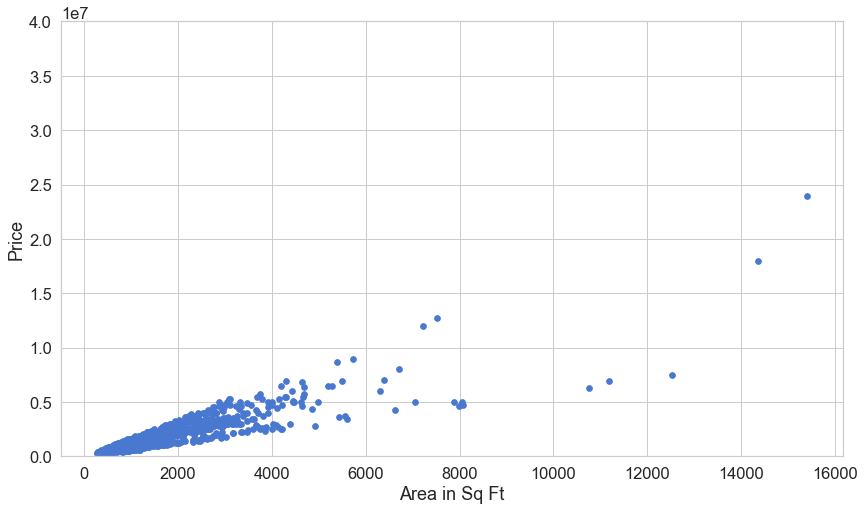

In [41]:
var = 'Area'
data2 = pd.concat([data['Price'], data[var]], axis=1)
data.plot.scatter(x=var, xlabel = 'Area in Sq Ft', y='Price', ylim=(0,40000000), s=32);

In [42]:
data['Prop_type'].value_counts()

Flat / Apartment    602
House               402
New development     138
Penthouse            35
other                12
Name: Prop_type, dtype: int64

In [43]:
#dropping columns becuase it was only needed for data cleaning
data.drop(columns = ['price_per_sqft'], inplace = True)

In [44]:
data["Prop_type"].replace({"Flat / Apartment": "1", "House": "2", "New development": "3", "Penthouse": "4", "other": "5"}, inplace=True)

In [45]:
data1 = data.sort_values("Price")

In [46]:
data1.head(30)

,Prop_type,Area,Bedrooms,Bathrooms,Receptions,County,Price
296,5,328,0,0,0,London,210000
147,5,381,0,0,0,London,260000
352,5,277,0,0,0,London,295000
326,5,344,0,0,0,London,295000
1967,1,274,1,1,1,London,299950
2649,1,573,1,1,1,Middlesex,300000
2626,1,601,2,2,2,Middlesex,325000
2678,1,477,1,1,1,Surrey,334950
761,1,302,1,1,1,London,350000
597,5,425,0,0,0,London,350000


In [47]:
data1.to_csv("Clean_data1.csv")

In [48]:
X = data.drop(columns = ['Price'])
y = data['Price']

## Training and testing models

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import neighbors
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [51]:
print(X_train.shape)

(951, 6)


In [52]:
print(X_test.shape)

(238, 6)


In [53]:
transform = make_column_transformer((OneHotEncoder(sparse = False), ['County']), remainder = 'passthrough')

In [54]:
scaler = StandardScaler()

In [55]:
regr = LinearRegression(normalize=True)

In [56]:
pipe = make_pipeline(transform, scaler, regr)

In [57]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['County'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

In [58]:
y_pred_regr = pipe.predict(X_test)

In [59]:
r2_score(y_test, y_pred_regr)

0.8546425691037918

In [60]:
mean_squared_error(y_test, y_pred_regr)

256154741272.53833

In [61]:
mean_absolute_error(y_test, y_pred_regr)

342231.47312876966

In [62]:
mean_absolute_percentage_error(y_test, y_pred_regr)

0.24642535253863898

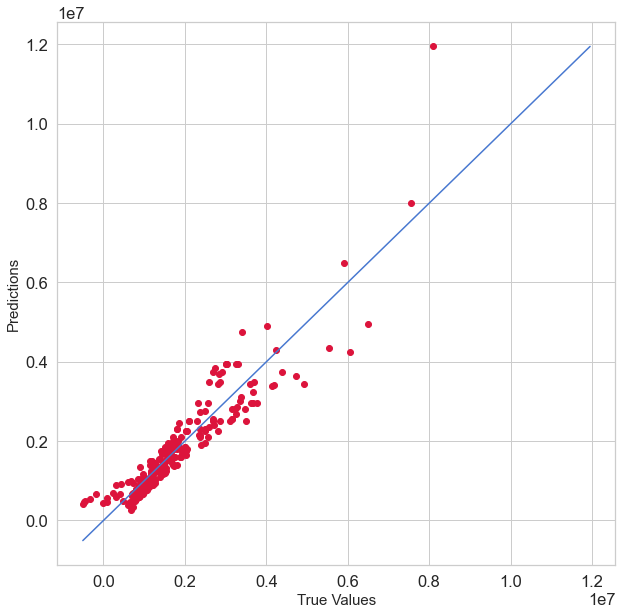

In [72]:
plt.figure(figsize=(10,10))
plt.scatter(y_pred_regr, y_test, c='crimson')


p1 = max(max(y_pred_regr), max(y_test))
p2 = min(min(y_pred_regr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)

plt.show()

In [75]:
poly = PolynomialFeatures(degree=3)

In [84]:
lasso = Lasso()

In [85]:
pipe1 = make_pipeline(transform, scaler, lasso)

In [86]:
pipe1.fit(X_train, y_train)

/Users/ajaymunjamani/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 618864756975.9375, tolerance: 242146535048.69226
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['County'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [87]:
y_pred_regr1 = pipe1.predict(X_test)

In [88]:
r2_score(y_test, y_pred_regr1)

0.8546426732227403

In [91]:
print(mean_squared_error(y_test, y_pred_regr1))
print(mean_absolute_error(y_test, y_pred_regr1))
print(mean_absolute_percentage_error(y_test, y_pred_regr1))

256154557789.91794
342231.24477667443
0.24642487977076907


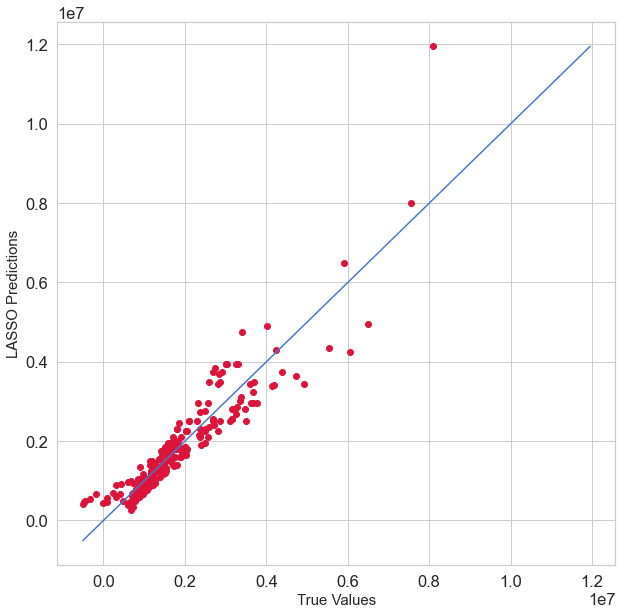

In [94]:
plt.figure(figsize=(10,10))
plt.scatter(y_pred_regr1, y_test, c='crimson')


p1 = max(max(y_pred_regr1), max(y_test))
p2 = min(min(y_pred_regr1), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('LASSO Predictions', fontsize=15)

plt.show()

In [96]:
from sklearn.tree import DecisionTreeRegressor

In [114]:
dtr = DecisionTreeRegressor(max_depth=5)

In [115]:
pipe2 = make_pipeline(transform, scaler, dtr)

In [116]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['County'])])),
                ('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=5))])

In [117]:
y_pred_regr2 = pipe2.predict(X_test)

In [118]:
print(r2_score(y_test, y_pred_regr2))
print(mean_squared_error(y_test, y_pred_regr2))
print(mean_absolute_error(y_test, y_pred_regr2))
print(mean_absolute_percentage_error(y_test, y_pred_regr2))


0.8611346026328403
244714217326.06418
302104.8913092571
0.16523354171769805


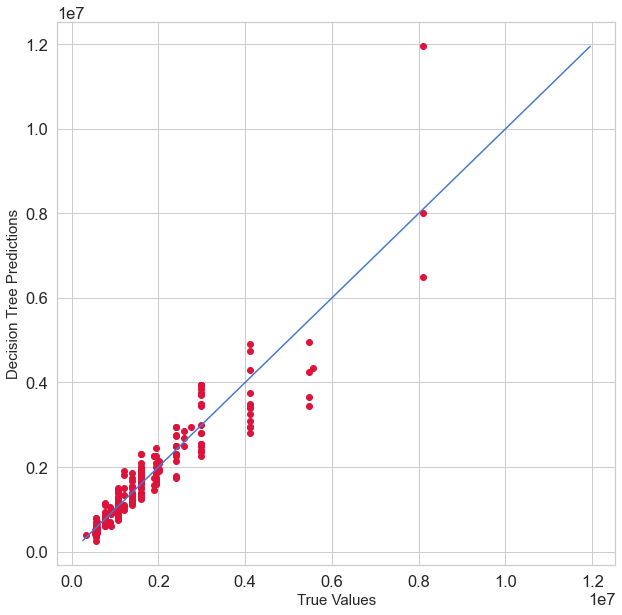

In [120]:
plt.figure(figsize=(10,10))
plt.scatter(y_pred_regr2, y_test, c='crimson')


p1 = max(max(y_pred_regr2), max(y_test))
p2 = min(min(y_pred_regr2), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Decision Tree Predictions', fontsize=15)

plt.show()

In [121]:
from sklearn.ensemble import RandomForestRegressor

In [130]:
rfr = RandomForestRegressor(max_depth=5, random_state=0)

In [131]:
pipe3 = make_pipeline(transform, scaler, rfr)

In [132]:
pipe3.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['County'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=5, random_state=0))])

In [133]:
y_pred_regr3 = pipe3.predict(X_test)

In [134]:
print(r2_score(y_test, y_pred_regr3))
print(mean_squared_error(y_test, y_pred_regr3))
print(mean_absolute_error(y_test, y_pred_regr3))
print(mean_absolute_percentage_error(y_test, y_pred_regr3))



0.8891446240908626
195353825116.45523
289263.3851382461
0.15878400958899636


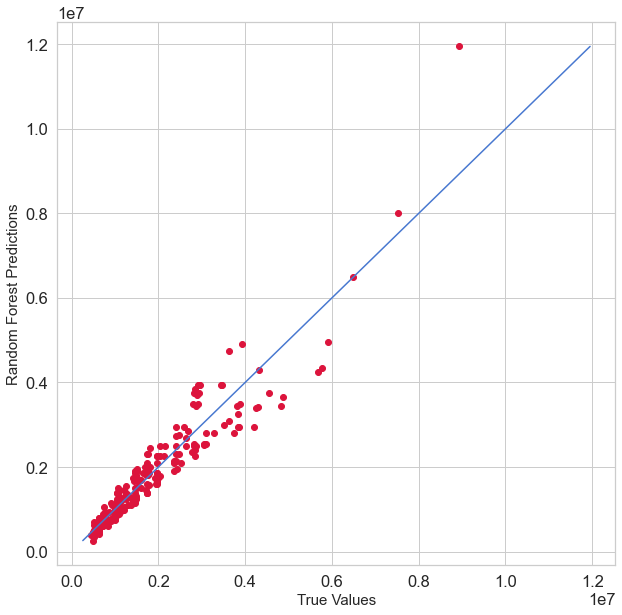

In [135]:
plt.figure(figsize=(10,10))
plt.scatter(y_pred_regr3, y_test, c='crimson')


p1 = max(max(y_pred_regr3), max(y_test))
p2 = min(min(y_pred_regr3), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Random Forest Predictions', fontsize=15)

plt.show()

In [153]:
knnr = neighbors.KNeighborsRegressor(n_neighbors = 2)
pipe4 = make_pipeline(transform, scaler, knnr)
pipe4.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['County'])])),
                ('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=2))])

In [154]:
y_pred_regr4 = pipe4.predict(X_test)

In [155]:
print(r2_score(y_test, y_pred_regr4))
print(mean_squared_error(y_test, y_pred_regr4))
print(mean_absolute_error(y_test, y_pred_regr4))
print(mean_absolute_percentage_error(y_test, y_pred_regr4))

0.897232642252452
181100792527.64392
281376.3256302521
0.1598008526650953


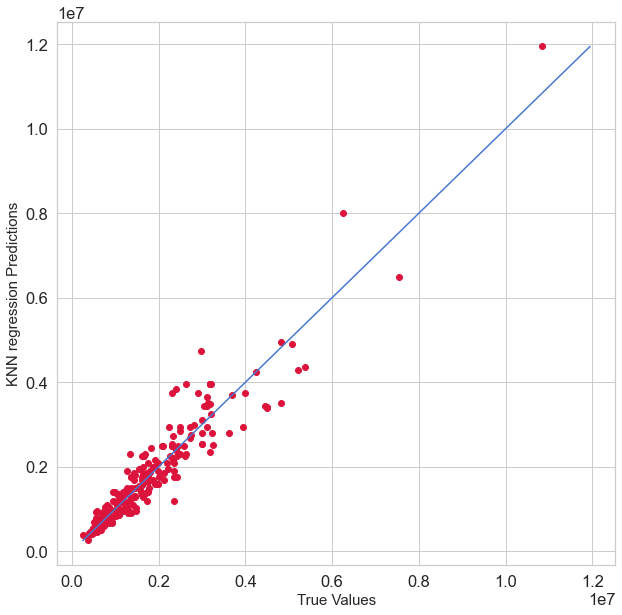

In [158]:
plt.figure(figsize=(10,10))
plt.scatter(y_pred_regr4, y_test, c='crimson')


p1 = max(max(y_pred_regr4), max(y_test))
p2 = min(min(y_pred_regr4), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('KNN regression Predictions', fontsize=15)

plt.show()

In [157]:
import pickle

In [ ]:

pickle.dump (pipe4, open('LR1.pkl', 'wb'))